In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [30]:
data_path = "forecasting_case_study.xlsx"
sales_data = pd.read_excel(data_path)
sales_data.head(5)

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


In [31]:
sales_data.duplicated().sum()

0

In [32]:
sales_data.columns


Index(['Product', 'date', 'Sales', 'Price Discount (%)', 'In-Store Promo',
       'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag',
       'V_DAY', 'EASTER', 'CHRISTMAS'],
      dtype='object')

In [33]:
sales_data.isna().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

First we check wheter there is any replicate rows or any NA values in the dataframe, and the result shows that there is none.

In [34]:
for col in sales_data.iloc[:, 4:]:
    print(col, ":", sales_data[col].unique())

In-Store Promo : [0 1]
Catalogue Promo : [0 1]
Store End Promo : [0 1]
Google_Mobility : [  0.     2.36   3.3    3.9    3.81   3.01   0.26 -15.7  -26.63 -28.49
 -27.3  -24.28 -22.58 -18.18 -15.91 -15.27 -13.24 -10.86 -10.13  -8.68
  -8.57  -7.5   -8.04  -9.36  -8.77  -9.93 -11.65 -13.23 -20.35 -19.41
 -18.83 -16.44  -7.28  -9.87  -7.79  -9.73  -7.39  -7.56  -8.39  -7.43
  -5.95  -7.2   -5.96  -5.3   -4.38  -4.74 -10.27  -6.95]
Covid_Flag : [0 1]
V_DAY : [0 1]
EASTER : [0 1]
CHRISTMAS : [0 1]


Then we check the values for the non-obvious columns to see whether they are categorical variables or numerical variable. For numerical variables, we can look for outliers and skewness. From above unique values in each row, we can see that only `Google_Mobility` (together with `Sales` and `Price Discount` which are ovbiously numerical) is numerical, and all other variables are categorical. 

SKU1 - Sales
10     108159
46     155253
96     109917
98     174994
115    119393
139    106885
150    258874
151    124261
Name: Sales, dtype: int64


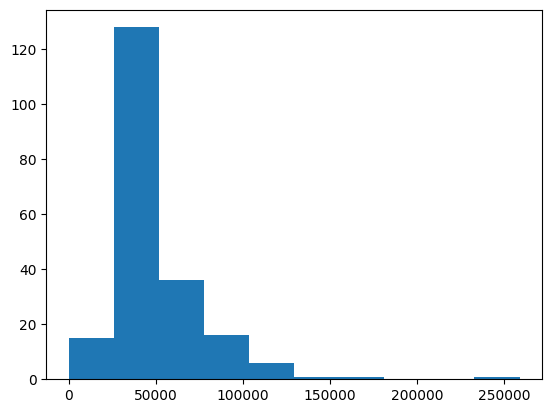

SKU1 - Price Discount (%)
10     0.44
32     0.44
34     0.44
39     0.44
57     0.44
70     0.44
84     0.44
91     0.44
96     0.44
115    0.44
122    0.44
139    0.44
150    0.44
151    0.44
172    0.45
188    0.44
Name: Price Discount (%), dtype: float64


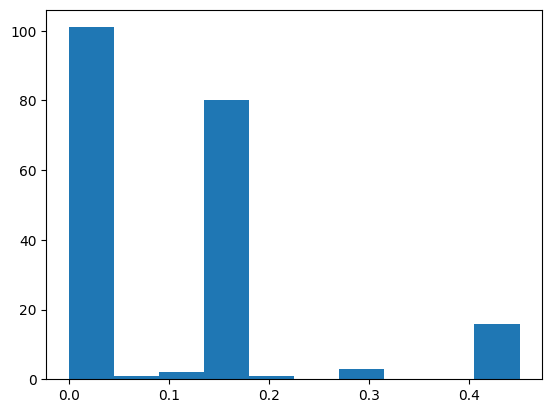

SKU1 - Google_Mobility
163   -15.70
164   -26.63
165   -28.49
166   -27.30
167   -24.28
168   -22.58
169   -18.18
170   -15.91
171   -15.27
184   -20.35
185   -19.41
186   -18.83
187   -16.44
Name: Google_Mobility, dtype: float64


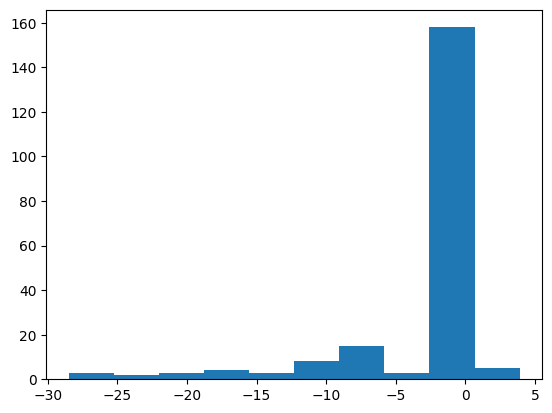

SKU2 - Sales
210    41915
219    52122
224    33566
242    40527
257    32549
270    41316
276    42002
291    32900
322    36674
328    37065
344    40111
350    39870
359    30409
388    34327
396    40169
Name: Sales, dtype: int64


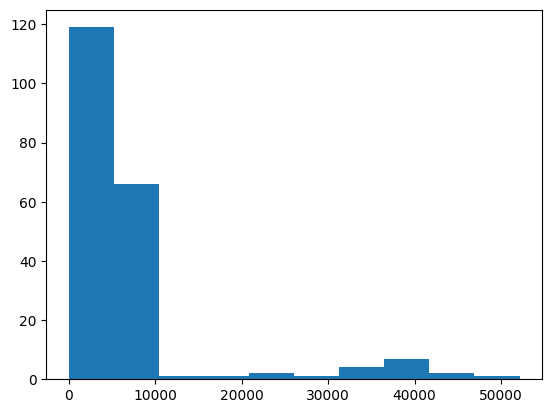

SKU2 - Price Discount (%)
210    0.5
219    0.5
224    0.5
242    0.5
257    0.5
265    0.5
270    0.5
276    0.5
291    0.5
311    0.5
322    0.5
328    0.5
344    0.5
350    0.5
359    0.5
388    0.5
396    0.5
400    0.5
Name: Price Discount (%), dtype: float64


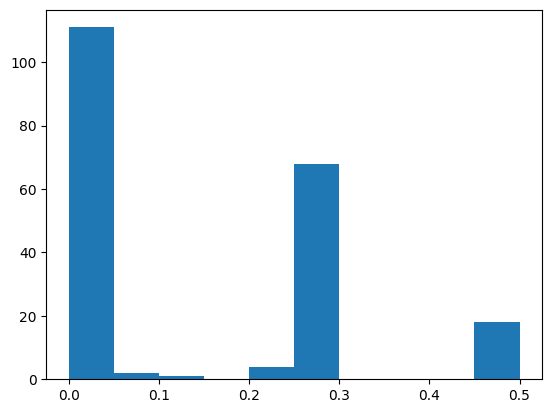

SKU2 - Google_Mobility
367   -15.70
368   -26.63
369   -28.49
370   -27.30
371   -24.28
372   -22.58
373   -18.18
374   -15.91
375   -15.27
388   -20.35
389   -19.41
390   -18.83
391   -16.44
Name: Google_Mobility, dtype: float64


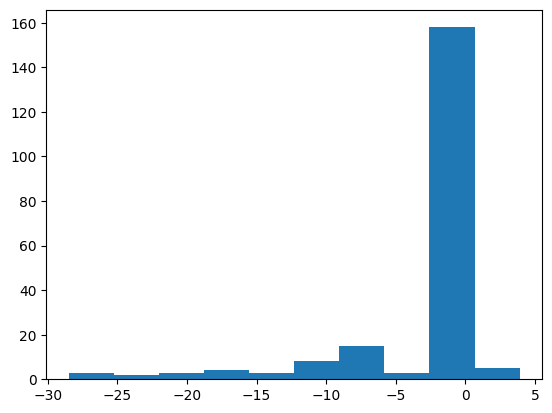

SKU3 - Sales
421    212245
426    248373
437    236242
447    212947
478    288322
494    237462
514    195088
530    197503
540    224723
546    207356
552    182891
566    187548
588    184365
592    189965
Name: Sales, dtype: int64


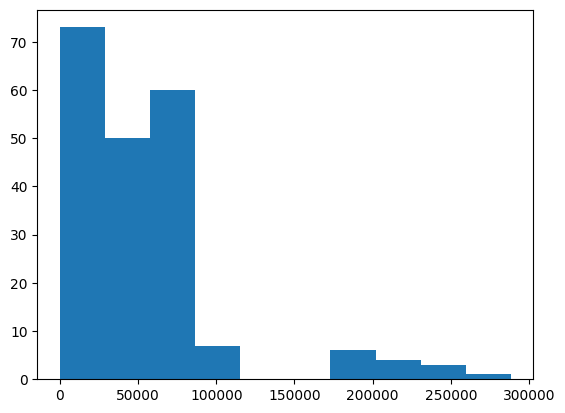

SKU3 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


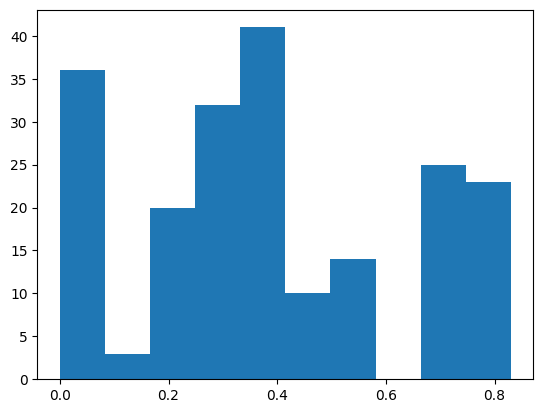

SKU3 - Google_Mobility
571   -15.70
572   -26.63
573   -28.49
574   -27.30
575   -24.28
576   -22.58
577   -18.18
578   -15.91
579   -15.27
592   -20.35
593   -19.41
594   -18.83
595   -16.44
Name: Google_Mobility, dtype: float64


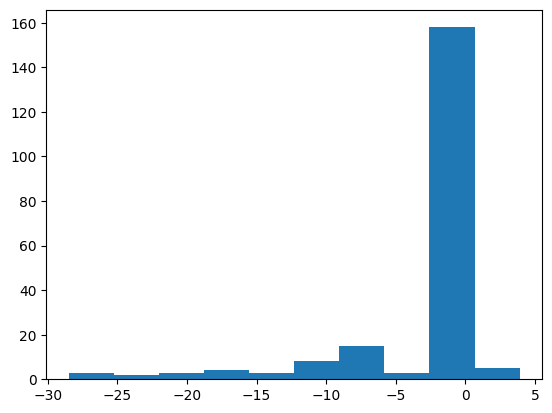

SKU4 - Sales
625    65464
630    63256
641    75377
651    69467
682    72261
698    66114
718    63842
734    59637
744    64115
750    56430
756    54996
770    58091
792    76346
796    81301
Name: Sales, dtype: int64


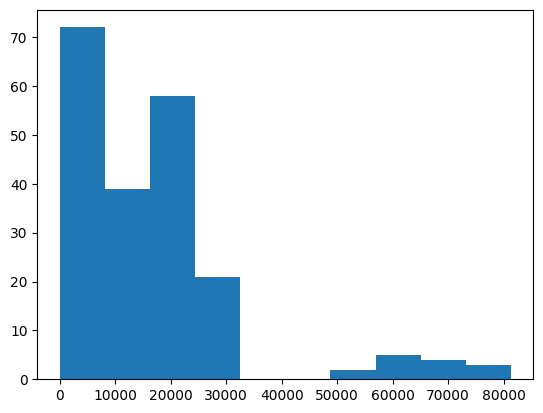

SKU4 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


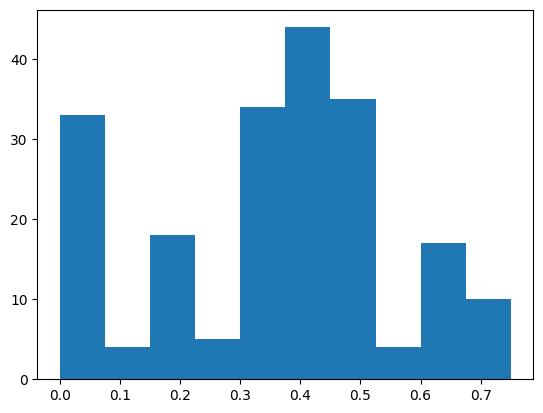

SKU4 - Google_Mobility
775   -15.70
776   -26.63
777   -28.49
778   -27.30
779   -24.28
780   -22.58
781   -18.18
782   -15.91
783   -15.27
796   -20.35
797   -19.41
798   -18.83
799   -16.44
Name: Google_Mobility, dtype: float64


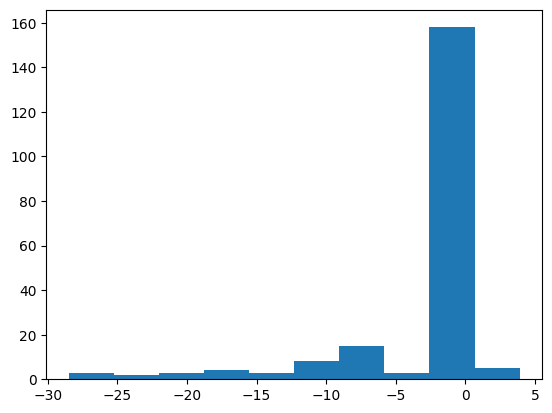

SKU5 - Sales
838    55905
844    73114
849    55567
856    50485
866    51114
885    55160
889    56275
934    47061
938    57064
941    61658
947    63644
952    56807
956    57496
987    61753
996    73058
Name: Sales, dtype: int64


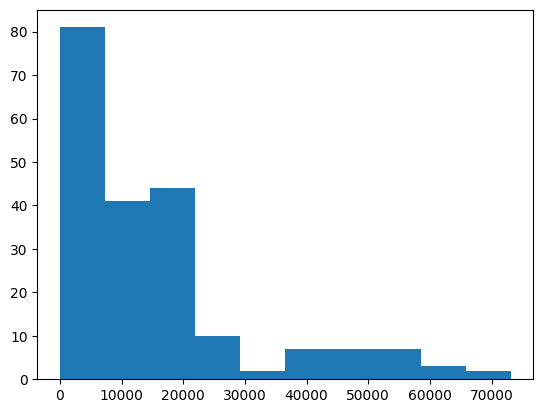

SKU5 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


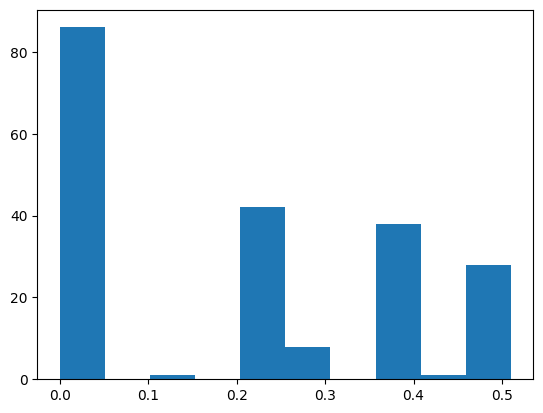

SKU5 - Google_Mobility
979    -15.70
980    -26.63
981    -28.49
982    -27.30
983    -24.28
984    -22.58
985    -18.18
986    -15.91
987    -15.27
1000   -20.35
1001   -19.41
1002   -18.83
1003   -16.44
Name: Google_Mobility, dtype: float64


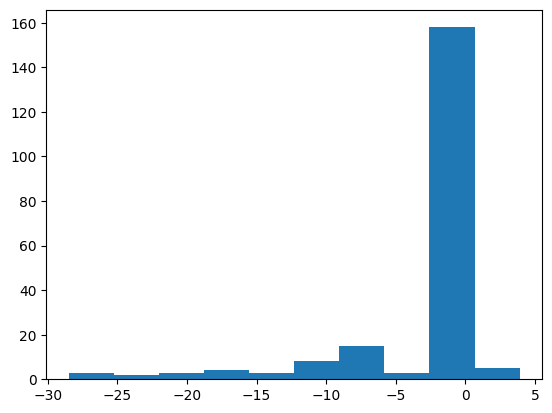

SKU6 - Sales
1025    118504
1037    142953
1041    131072
1046    118276
1053    129254
1057    154098
1058    241114
1089    128647
1105    127468
1109    140995
1110    181833
1161    138789
1162    143887
1163    163536
1214    115798
1215    152186
Name: Sales, dtype: int64


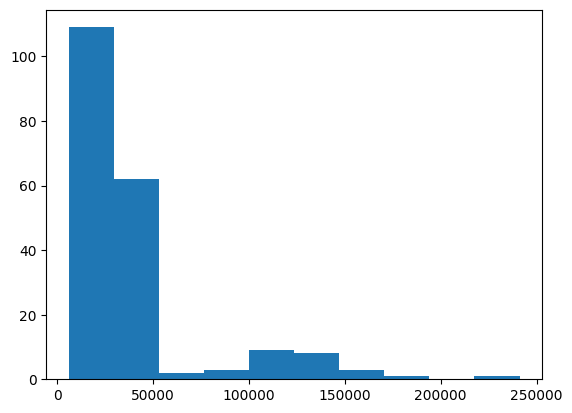

SKU6 - Price Discount (%)
1173    0.69
1175    0.69
1177    0.69
1179    0.69
1181    0.69
1183    0.69
Name: Price Discount (%), dtype: float64


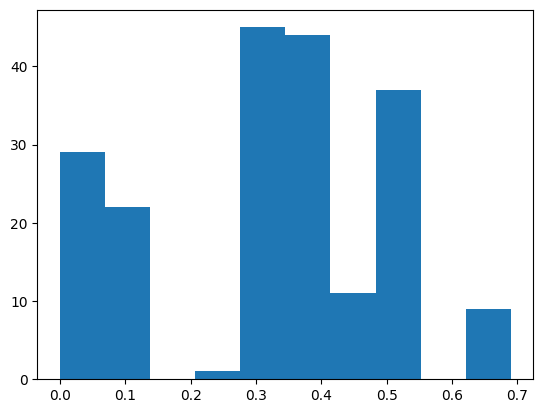

SKU6 - Google_Mobility
1183   -15.70
1184   -26.63
1185   -28.49
1186   -27.30
1187   -24.28
1188   -22.58
1189   -18.18
1190   -15.91
1191   -15.27
1204   -20.35
1205   -19.41
1206   -18.83
1207   -16.44
Name: Google_Mobility, dtype: float64


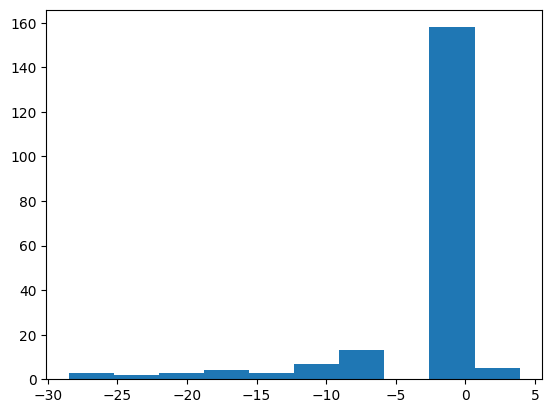

In [35]:
for i in range(1, 7):
    product = "SKU" + str(i)
    product_data = sales_data[sales_data["Product"] == product]
    for col in ["Sales", "Price Discount (%)", "Google_Mobility"]:
        col_data = product_data[col]
        z_scores = np.abs(stats.zscore(col_data.dropna()))
        outliers = np.where(z_scores > 2)[0]  # outliers have z-score > 2
        print(product, "-", col)
        print(product_data.iloc[outliers][col])
        plt.hist(col_data)
        plt.show()

We can see that for all products, `Sales` is right skewed and `Google_Mobility` is left skewed, while `Price Discount (%)` is more randomly scattered. There are some outliers in each category. We believe that since discount is scattered everwhere, and a lot of the outliers are actually the same value, so they are not truely outliers, but just the nature of the data. Therefore, we will not remove those. While for the other two columns, I believe we need to farther investigate into the patterns of the data before deciding whether they are truely outliers. If there are true outliers, we would want to replace with mean of the column. This is because each data point is important in analyzing the trends and we cannot simply remove columns with outliers.

Lets further investigate the data points of the two columns(Sales and Google_Mobility)  

In [36]:
sales_data.describe()

,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,2019-01-13 02:04:08.275862016,30294.678982,0.251043,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
min,2017-02-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,2018-01-21 00:00:00,7212.750000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-01-13 00:00:00,19742.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-01-05 00:00:00,40282.250000,0.400000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020-12-27 00:00:00,288322.000000,0.830000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000
std,NaN,35032.527297,0.215494,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169


In the sales column, there is a huge difference between the mean and the 50th percentile, the maximum and 75th percentile this shows the right skewness of the data. The google mobility column is quite the opposite, the mean value being lower than the 50th percentile and min value is lower than 25th percentile showing the leftskewdness of the data, lets visualize below using box plot.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


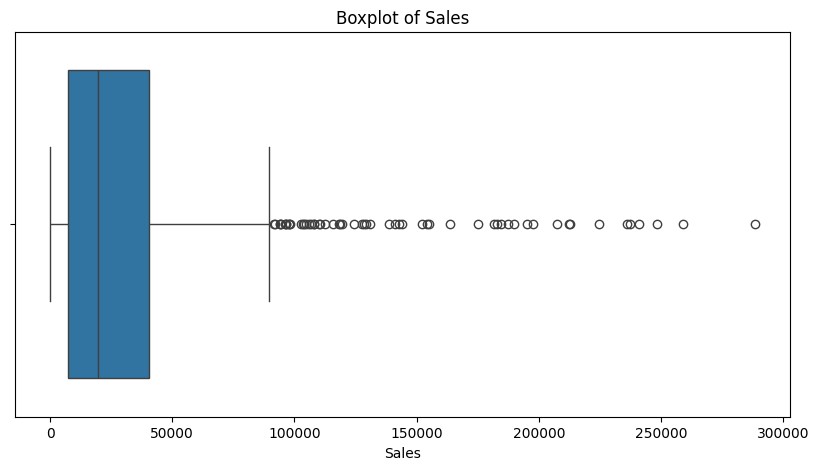

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


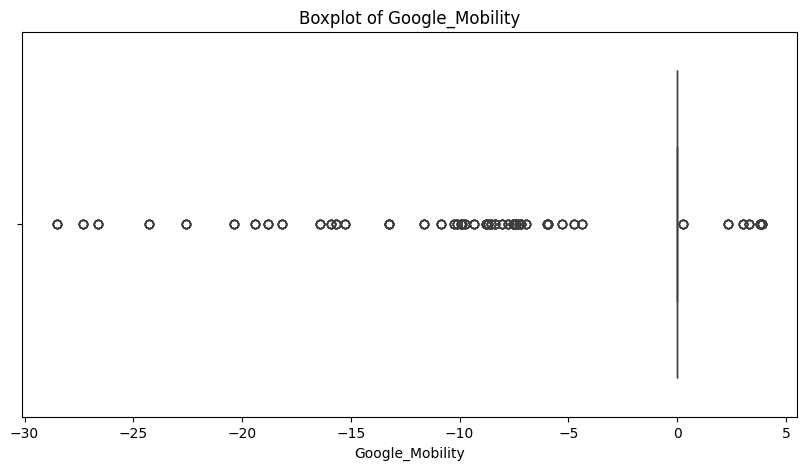

In [37]:
for col in ["Sales", "Google_Mobility"]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=sales_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Google_mobility**

In [38]:
# checking for the minimum value

Google_Mobility_min = sales_data.loc[sales_data['Google_Mobility'].idxmin()]
Google_Mobility_min

Product                              SKU1
date                  2020-04-05 00:00:00
Sales                               39473
Price Discount (%)                   0.01
In-Store Promo                          0
Catalogue Promo                         1
Store End Promo                         0
Google_Mobility                    -28.49
Covid_Flag                              1
V_DAY                                   0
EASTER                                  0
CHRISTMAS                               0
Name: 165, dtype: object

In [39]:


GM_ascend = sales_data.sort_values(by='Google_Mobility', ascending= True)

GM_ascend


,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
165,SKU1,2020-04-05,39473,0.01,0,1,0,-28.49,1,0,0,0
573,SKU3,2020-04-05,29350,0.67,0,1,0,-28.49,1,0,0,0
369,SKU2,2020-04-05,3719,0.01,0,0,0,-28.49,1,0,0,0
981,SKU5,2020-04-05,16928,0.25,0,1,0,-28.49,1,0,0,0
1185,SKU6,2020-04-05,9705,0.53,0,0,0,-28.49,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
975,SKU5,2020-02-23,5666,0.00,0,0,0,3.90,1,0,0,0
159,SKU1,2020-02-23,29275,0.01,0,0,0,3.90,1,0,0,0
1179,SKU6,2020-02-23,24330,0.69,0,0,0,3.90,1,0,0,0
567,SKU3,2020-02-23,31172,0.74,0,1,0,3.90,1,0,0,0


Google mobility is highly affected by covid flag(which is binary, 1- yes and 0-no), the first five weeks that covid_flag was 1, the google mobilty was high then it dropped.Therefore, the leftskewness in the google mobility column arent truly outliers but was affected by the covid data.Below we will try few methods to normalize the data to reduce the skewness and maintain the parttern in our data. 

In [40]:
# applying the cube root transformation

sales_data['cuberoot_googlemobility'] = np.cbrt(sales_data['Google_Mobility'].max() + 1 - sales_data['Google_Mobility'])
sales_data['cuberoot_googlemobility']

0       1.698499
1       1.698499
2       1.698499
3       1.698499
4       1.698499
          ...   
1213    2.318316
1214    2.368691
1215    2.310225
1216    2.213825
1217    2.295770
Name: cuberoot_googlemobility, Length: 1218, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


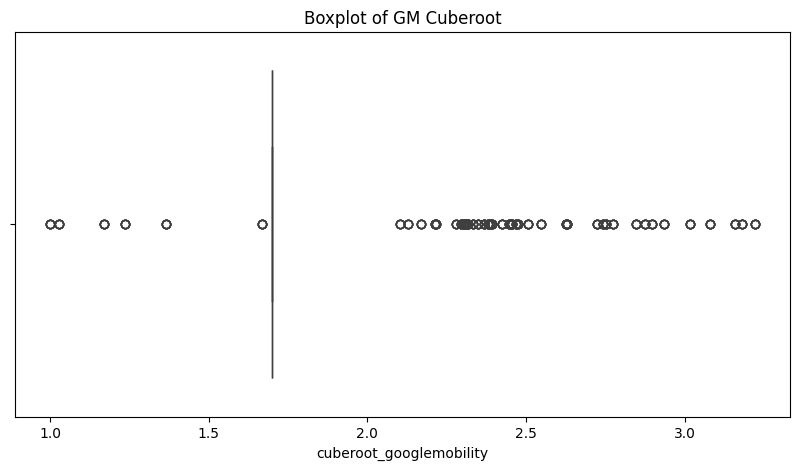

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sales_data['cuberoot_googlemobility'])
plt.title('Boxplot of GM Cuberoot')
plt.show()

In [42]:
#Transforming the values using the squareroot method

sales_data['squareroot_googlemobility'] = np.sqrt(sales_data['Google_Mobility'].max() + 1 - sales_data['Google_Mobility'])
sales_data['squareroot_googlemobility']

0       2.213594
1       2.213594
2       2.213594
3       2.213594
4       2.213594
          ...   
1213    3.529873
1214    3.645545
1215    3.511410
1216    3.293934
1217    3.478505
Name: squareroot_googlemobility, Length: 1218, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


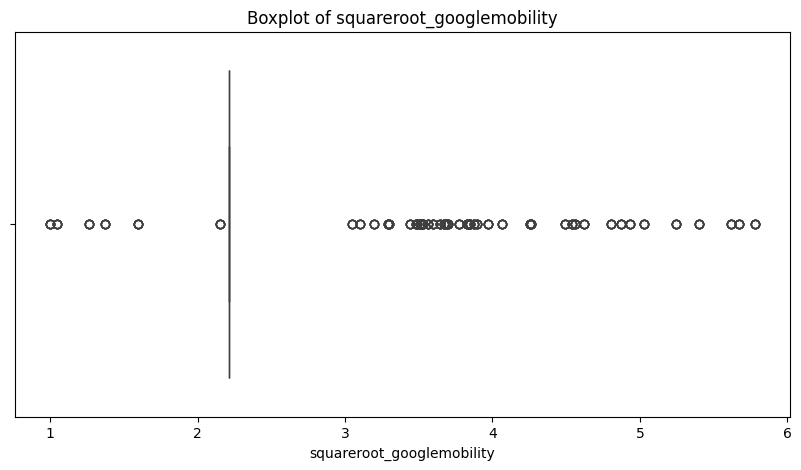

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sales_data['squareroot_googlemobility'])
plt.title('Boxplot of squareroot_googlemobility')
plt.show()

**Sales**

In [44]:
max_sales = sales_data.loc[sales_data['Sales'].idxmax()]
max_sales

Product                                     SKU3
date                         2018-06-10 00:00:00
Sales                                     288322
Price Discount (%)                           0.5
In-Store Promo                                 1
Catalogue Promo                                0
Store End Promo                                1
Google_Mobility                              0.0
Covid_Flag                                     0
V_DAY                                          0
EASTER                                         0
CHRISTMAS                                      0
cuberoot_googlemobility                 1.698499
squareroot_googlemobility               2.213594
Name: 478, dtype: object

In [45]:
sales_desc = sales_data.sort_values(by='Sales', ascending=False)

sales_desc.head(15)

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,cuberoot_googlemobility,squareroot_googlemobility
478,SKU3,2018-06-10,288322,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
150,SKU1,2019-12-22,258874,0.44,0,1,1,0.00,0,0,0,0,1.698499,2.213594
426,SKU3,2017-06-11,248373,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
1058,SKU6,2017-10-29,241114,0.53,1,0,0,0.00,0,0,0,0,1.698499,2.213594
494,SKU3,2018-09-30,237462,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
437,SKU3,2017-08-27,236242,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
540,SKU3,2019-08-18,224723,0.52,1,0,1,0.00,0,0,0,0,1.698499,2.213594
447,SKU3,2017-11-05,212947,0.50,1,0,1,0.00,0,0,0,0,1.698499,2.213594
421,SKU3,2017-05-07,212245,0.50,1,0,0,0.00,0,0,0,0,1.698499,2.213594
546,SKU3,2019-09-29,207356,0.54,1,0,1,0.00,0,0,0,0,1.698499,2.213594


From the above we can see that the sales are influenced by a few factors(the presence of promotions and the discount), also the SKU3 seems to sell alot. Therefore, we cannot treat this values as outliers but rather normalize them. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


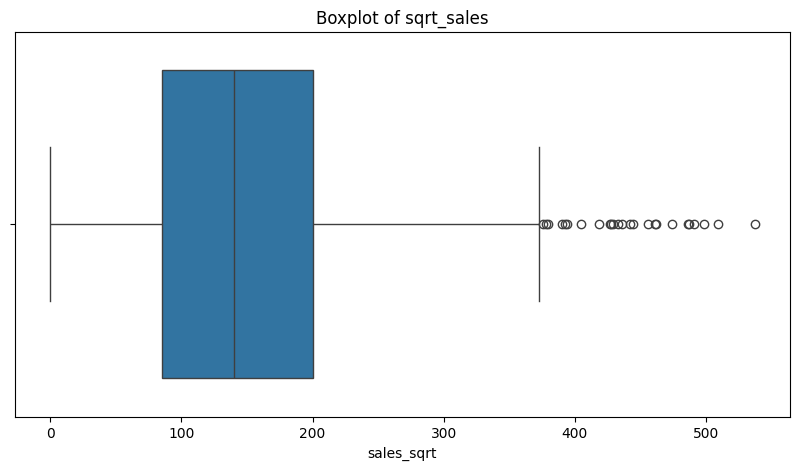

In [46]:
# normalizing the sales column using square roots and visualising

sales_data['sales_sqrt'] =np.sqrt(sales_data['Sales'])

plt.figure(figsize=(10, 5))
sns.boxplot(x=sales_data['sales_sqrt'])
plt.title('Boxplot of sqrt_sales')
plt.show()

In [47]:
sales_data.dtypes

Product                              object
date                         datetime64[ns]
Sales                                 int64
Price Discount (%)                  float64
In-Store Promo                        int64
Catalogue Promo                       int64
Store End Promo                       int64
Google_Mobility                     float64
Covid_Flag                            int64
V_DAY                                 int64
EASTER                                int64
CHRISTMAS                             int64
cuberoot_googlemobility             float64
squareroot_googlemobility           float64
sales_sqrt                          float64
dtype: object

In [48]:
sales_data.set_index('date', inplace=True)

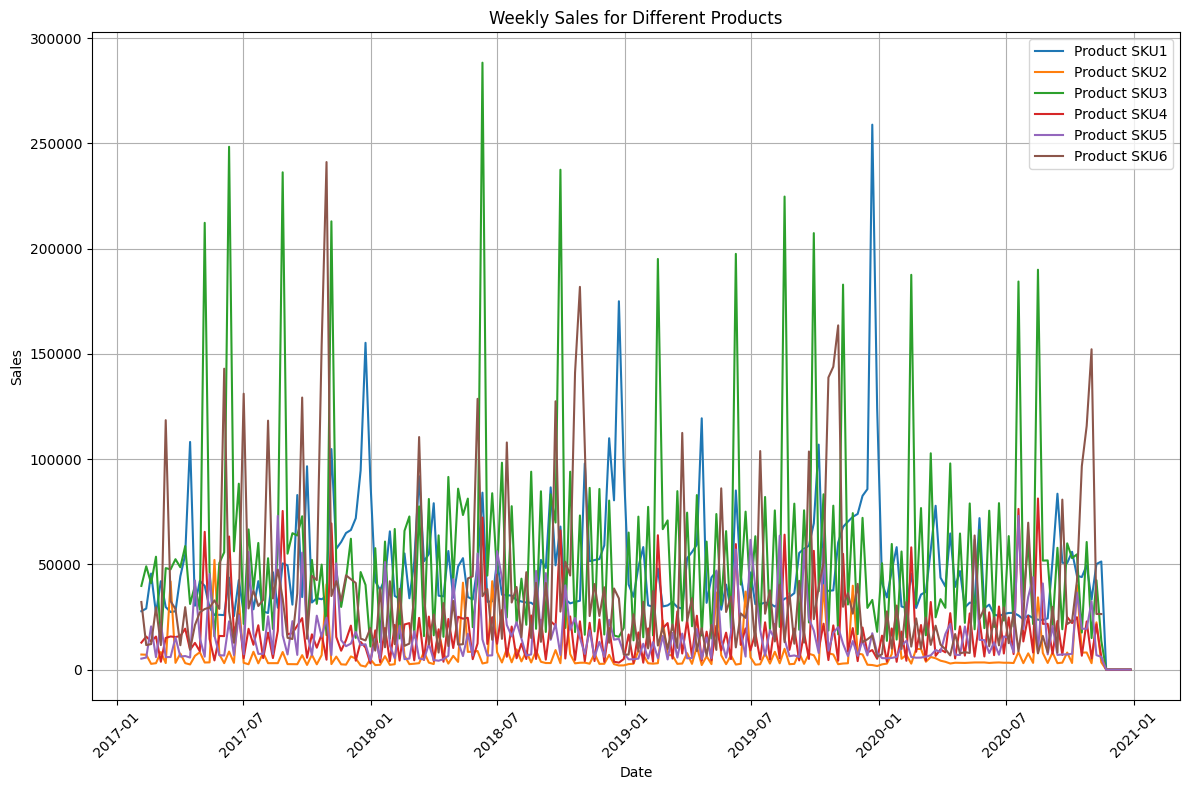

In [49]:
# Plot weekly sales for each product SKU

weekly_sales = sales_data.groupby(['Product']).resample('W')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 8))

for sku in weekly_sales['Product'].unique():
    product_sales = weekly_sales[weekly_sales['Product'] == sku]
    plt.plot(product_sales['date'], product_sales['Sales'], label=f'Product {sku}')

plt.title('Weekly Sales for Different Products')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
sales_data.head()

,Product,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,cuberoot_googlemobility,squareroot_googlemobility,sales_sqrt
date,,,,,,,,,,,,,,
2017-02-05,SKU1,27750,0.00,0,0,0,0.0,0,0,0,0,1.698499,2.213594,166.583312
2017-02-12,SKU1,29023,0.00,1,0,1,0.0,0,1,0,0,1.698499,2.213594,170.361381
2017-02-19,SKU1,45630,0.17,0,0,0,0.0,0,0,0,0,1.698499,2.213594,213.611797
2017-02-26,SKU1,26789,0.00,1,0,1,0.0,0,0,0,0,1.698499,2.213594,163.673455
2017-03-05,SKU1,41999,0.17,0,0,0,0.0,0,0,0,0,1.698499,2.213594,204.936576


In [51]:
sales_data['Product'] = sales_data['Product'].astype('category').cat.codes

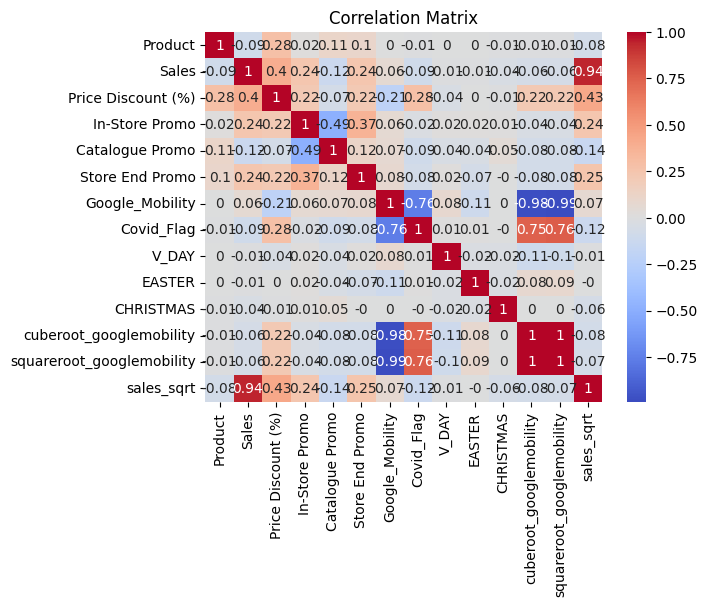

In [52]:


correlation = sales_data.corr().round(2)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
#correlations of each sku sales and the other variables

columns_to_correlate = ['Price Discount (%)', 'In-Store Promo', 'Catalogue Promo', 
                        'Store End Promo', 'Google_Mobility', 'Covid_Flag', 
                        'V_DAY', 'EASTER', 'CHRISTMAS']

for product in sales_data['Product'].unique():
    product_data = sales_data[sales_data['Product'] == product]
    
    correlation_results = product_data[['Sales'] + columns_to_correlate].corr()
    
    print(f"Correlation for sku {product}:")
    print(correlation_results['Sales'][columns_to_correlate])
    print("\n")

Correlation for sku 0:
Price Discount (%)    0.729203
In-Store Promo       -0.004615
Catalogue Promo       0.270477
Store End Promo      -0.027558
Google_Mobility       0.143377
Covid_Flag           -0.237397
V_DAY                -0.063169
EASTER                0.024586
CHRISTMAS             0.011218
Name: Sales, dtype: float64


Correlation for sku 1:
Price Discount (%)    0.802443
In-Store Promo        0.261703
Catalogue Promo      -0.140995
Store End Promo      -0.074978
Google_Mobility       0.062346
Covid_Flag           -0.081480
V_DAY                 0.060496
EASTER               -0.009397
CHRISTMAS            -0.046872
Name: Sales, dtype: float64


Correlation for sku 2:
Price Discount (%)    0.294523
In-Store Promo        0.406240
Catalogue Promo      -0.400192
Store End Promo       0.285299
Google_Mobility       0.066014
Covid_Flag           -0.098476
V_DAY                 0.031057
EASTER                0.012367
CHRISTMAS            -0.089250
Name: Sales, dtype: float64


Corr

# hypothesis testing
**1. Price Discounts Significantly Increase Sales for Each Product**

In [54]:
# regresion of sales on proce discount

products = sales_data['Product'].unique()

for product in products:
    product_data = sales_data[sales_data['Product'] == product]
    
    X = product_data['Price Discount (%)']
    X = sm.add_constant(X)  
    y = product_data['Sales']
    
    model = sm.OLS(y, X).fit()
    
    print(f"Results for PRODUCT: {product}:")
    print(model.summary())
    print("\n")

Results for PRODUCT: 0:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     229.4
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           4.01e-35
Time:                        20:41:31   Log-Likelihood:                -2309.0
No. Observations:                 204   AIC:                             4622.
Df Residuals:                     202   BIC:                             4629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const       

The pvalue for each product is less than the normal threshold(0.05)therefore, we reject null hypothesis and that price discount has a huge impact on the sales of each product

**2.product in storepromotions increases sales** 

In [55]:
# regresion of sales on proce discount

for product in products:
    product_data = sales_data[sales_data['Product'] == product]
    
    
    X = product_data['In-Store Promo']
    X = sm.add_constant(X)
    y = product_data['Sales']
    model = sm.OLS(y, X).fit()
    
    print(f"PRODUCT {product}: In-Store Promo")
    print(model.summary())
    print("/n")

PRODUCT 0: In-Store Promo
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                  0.004303
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.948
Time:                        20:41:33   Log-Likelihood:                -2386.4
No. Observations:                 204   AIC:                             4777.
Df Residuals:                     202   BIC:                             4783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.

The products p-values is less than threshold 0.05 for most of the products except product 0(sku 1), therefore we reject the null hypothesis for all except SKU1. 

**3. External factors like Google_Mobility and Covid_Flag have a significant impact on sales.**

<Axes: title={'center': 'Covid Flag vs Sales'}, xlabel='Covid_Flag', ylabel='Sales'>

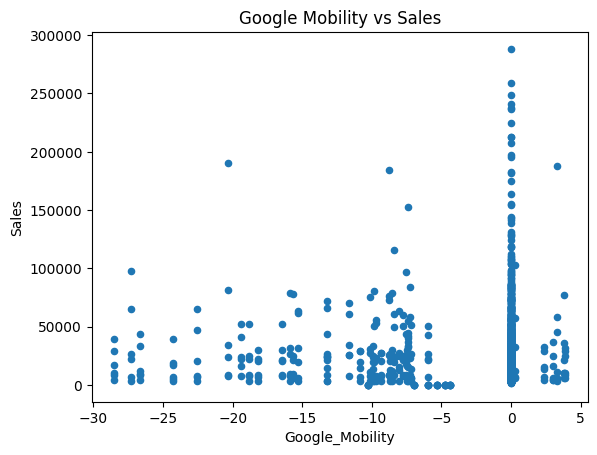

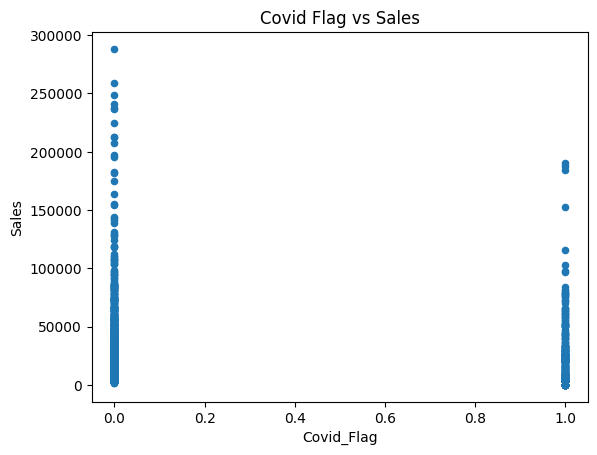

In [56]:
sales_data.plot.scatter(x='Google_Mobility', y='Sales', title='Google Mobility vs Sales')
sales_data.plot.scatter(x='Covid_Flag', y='Sales', title='Covid Flag vs Sales')

In [57]:
sales_data[['Sales', 'Google_Mobility', 'Covid_Flag']].corr()

,Sales,Google_Mobility,Covid_Flag
Sales,1.000000,0.058781,-0.085571
Google_Mobility,0.058781,1.000000,-0.756752
Covid_Flag,-0.085571,-0.756752,1.000000


In [58]:
# multiple regression analysis
X = sales_data[['Google_Mobility', 'Covid_Flag']]
X = sm.add_constant(X)  # Add constant for intercept
y = sales_data['Sales']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.533
Date:                Mon, 09 Sep 2024   Prob (F-statistic):             0.0109
Time:                        20:41:34   Log-Likelihood:                -14468.
No. Observations:                1218   AIC:                         2.894e+04
Df Residuals:                    1215   BIC:                         2.896e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.192e+04   1138.123     

The p-value for google moblity is 0.749 which is greater than 0.05, therefore we cannot reject the null hypotheis. however, the cobvid_flag pvalue is 0.028 which is lower than 0.05, hence we reject the null hypothesis in this case.

**4. Sales are significantly higher during holiday periods (Valentine’s Day, Easter, Christmas) compared to non-holiday periods.**

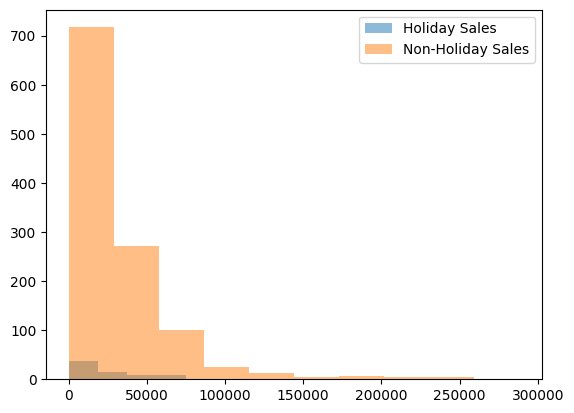

In [59]:
#plotting average sales during holidays and non holidays

holiday_sales = sales_data[(sales_data['V_DAY'] == 1) | (sales_data['EASTER'] == 1) | (sales_data['CHRISTMAS'] == 1)]['Sales']
non_holiday_sales = sales_data[(sales_data['V_DAY'] == 0) & (sales_data['EASTER'] == 0) & (sales_data['CHRISTMAS'] == 0)]['Sales']

plt.hist(holiday_sales, alpha=0.5, label='Holiday Sales')
plt.hist(non_holiday_sales, alpha=0.5, label='Non-Holiday Sales')
plt.legend()
plt.show()



In [60]:
holiday_mean = holiday_sales.mean().round(2)
non_holiday_mean = non_holiday_sales.mean().round(2)
print(f"Holiday Sales Mean: {holiday_mean}, Non-Holiday Sales Mean: {non_holiday_mean}")

Holiday Sales Mean: 25795.96, Non-Holiday Sales Mean: 30573.15


In [61]:
t_stat, p_val = stats.ttest_ind(holiday_sales, non_holiday_sales)
print(f"T-Stat: {t_stat}, P-value: {p_val}")

T-Stat: -1.1151471421457713, P-value: 0.26500770903983983


pvalue is les than the significant vthreshold 0.05, there we reject the H0

**5. Seasonal ocassions (christmass, easter and valentines day) impact sales positively**


In [62]:
#christmass

for product in products:
    product_data = sales_data[sales_data['Product'] == product]
    
    X = product_data['CHRISTMAS']
    X = sm.add_constant(X)
    y = product_data['Sales']
    model = sm.OLS(y, X).fit()
    
    print(f"PRODUCT {product}: (CHRISTMAS):")
    print(model.summary())
    print('/n')

PRODUCT 0: (CHRISTMAS):
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02542
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.873
Time:                        20:41:35   Log-Likelihood:                -2386.4
No. Observations:                 204   AIC:                             4777.
Df Residuals:                     202   BIC:                             4783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.748e+04   2068

The p-value for SKU1,2 and 6 are higher the 0.05, therefore we cannot reject the null hypothesis. However, for the other products(SKU3,4 and 5) are lower hence we reject the null hyothesis

In [63]:
# EASTER

for product in products:
    product_data = sales_data[sales_data['Product'] == product]
    
    X = product_data['EASTER']
    X = sm.add_constant(X)
    y = product_data['Sales']
    model = sm.OLS(y, X).fit()
    
    print(f"PRODUCT {product}: (EASTER)")
    print(model.summary())
    print('/n')

PRODUCT 0: (EASTER)
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1222
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.727
Time:                        20:41:36   Log-Likelihood:                -2386.3
No. Observations:                 204   AIC:                             4777.
Df Residuals:                     202   BIC:                             4783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.742e+04   2068.361

The pvalue for the sales product(SKU1,2,3,4) during easter are higher that 0.05,therefore we cannot reject the null hypothesis but reject it for SKU 5 and 6

In [64]:
# VALENTINES DAY

for product in products:
    product_data = sales_data[sales_data['Product'] == product]
    
    X = product_data['V_DAY']
    X = sm.add_constant(X)
    y = product_data['Sales']
    model = sm.OLS(y, X).fit()
    
    print(f"PRODUCT {product}: (Valentines Day)")
    print(model.summary())
    print('/n')


PRODUCT 0: (Valentines Day)
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8093
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.369
Time:                        20:41:36   Log-Likelihood:                -2386.0
No. Observations:                 204   AIC:                             4776.
Df Residuals:                     202   BIC:                             4783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.778e+04   

The pvalue for some products(SKU1,2,6) are lower than 0.05 there we reject the null hyothesis, but higher in some(SKU3,4,5) hence we cannot reject H0

From the above seasonal analysis, we can see that product sales are impacted differently based on the holiday. 
The sales of SKU3,4,5 are positively affected by christmass and SKU1,2,6 BY VALENTINES DAY and SKU 5 AND 6 by Easter